In [9]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [10]:
class KNN:
    def __init__(self, k=3):
        self.k = k
        self.X_train = None
        self.y_train = None

    def fit(self, X, Y):
        self.X_train = X
        self.y_train = Y

    def predict_classification(self, X):
        return np.array([self._predict_class(x) for x in X])

    def predict_regression(self, X):
        return np.array([self._predict_reg(x) for x in X])

    def _predict_class(self, x):
        distances = [KNN.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        return most_common

    def _predict_reg(self, x):
        distances = [KNN.euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_values = [self.y_train[i] for i in k_indices]
        return np.mean(k_nearest_values)

    @staticmethod
    def euclidean_distance(x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

In [ ]:
iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Custom kNN
my_knn = KNN(k=3)
my_knn.fit(X_train, y_train)
my_preds = my_knn.predict_classification(X_test)
my_acc = accuracy_score(y_test, my_preds)

#kNN from scikit-learn
sk_knn = KNeighborsClassifier(n_neighbors=3)
sk_knn.fit(X_train, y_train)
sk_preds = sk_knn.predict(X_test)
sk_acc = accuracy_score(y_test, sk_preds)


print(f"Accuracy of custom KNN:     {my_acc:.2f}")
print(f"Accuracy of sklearn KNN:    {sk_acc:.2f}")

Accuracy of custom KNN:     1.00
Accuracy of sklearn KNN:    1.00


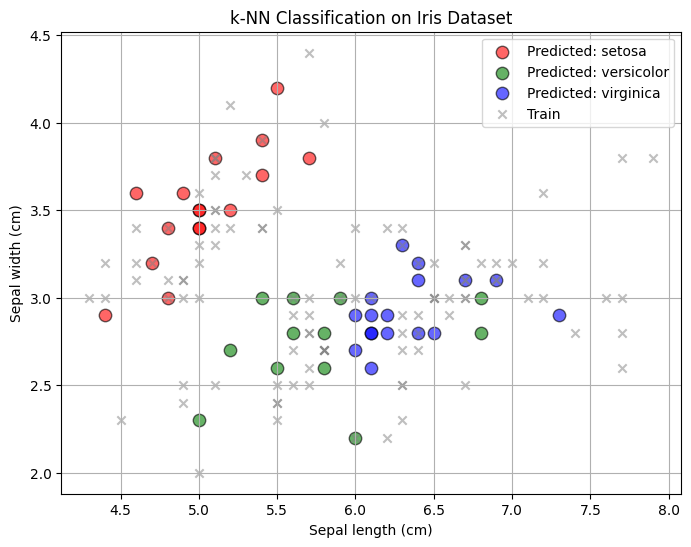

In [ ]:
X = iris.data[:, :2]  # sepal length, sepal width
y = iris.target
target_names = iris.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

knn = KNN(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict_classification(X_test)

plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']

for i, color in enumerate(colors):
    idx = y_pred == i
    plt.scatter(X_test[idx, 0], X_test[idx, 1], c=color, label=f'Predicted: {target_names[i]}', edgecolor='k', s=80, alpha=0.6)

plt.scatter(X_train[:, 0], X_train[:, 1], c='gray', label='Train', marker='x', alpha=0.5)

plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('k-NN Classification on Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()